In [1]:
import sys, os
sys.path.append(os.path.abspath("../"))
from modules import binance_anacrypt
from modules import mytelebot
import numpy as np
import pandas as pd
import collections
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
# getcrypt=binance_anacrypy.get_eval_crypto_stat("ETHEUR","15m")

In [6]:
# interval_list=["3m","5m","15m","30m","1h","2h","6h","12h","1d","3d","1w","1M"]
interval_list=["2h","4h","12h","1d","3d","1w","1M"]
# interval_list=["1m","3m","5m","15m","30m","1h","2h"]
coinlist=["XLMUSDT","BTCEUR","MATICUSDT","ADAUSDT","SOLUSDT","XRPEUR","DOGEUSDT","YFIEUR","LTCUSDT","ETHEUR"]#,"LINKUSDT","BALUSDT"]
attr_list=["EMA7 sl","EMA30 sl","Recmnd>>"]

In [7]:
binance_anacrypt.gen_pandas_crypt_table(coinlist,interval_list,attr_list,ext=".png",movie_fmt="gif")

In [5]:
x=binance_anacrypt.get_eval_crypto_stat("ETHEUR","15m")

In [17]:
x.dataframe["Close"].iloc[-1]

1713.46

In [3]:
mybot=mytelebot.init_mybot(test=False)
# mybot.update_subscriber_preferences()
mybot.broadcast_cryptoupdate()

In [11]:
mybot.bot_sbs.subscriber_dict

{360611597: {'first_name': 'Mayur',
  'last_name': None,
  'date added': 'Wed May 19 15:13:33 2021',
  'coin pair': ['BTCUSD']},
 1517365063: {'first_name': 'Suhas',
  'last_name': 'Vishwanath',
  'date added': 'Thu May 20 13:48:51 2021',
  'coin pair': ['BTCUSD']},
 1812998532: {'first_name': 'Nagendra',
  'last_name': None,
  'date added': 'Fri May 21 01:14:57 2021',
  'coin pair': ['BTCUSD']},
 1709448407: {'first_name': 'Aditya',
  'last_name': 'Rotti',
  'date added': 'Sat May 22 00:09:09 2021',
  'coin pair': ['BTCUSD']},
 449208196: {'first_name': 'Garima',
  'last_name': 'Saraswat',
  'date added': 'Sat May 22 00:10:26 2021',
  'coin pair': ['BTCUSD']}}

In [9]:
mybot.bot.getUpdates(offset=mybot.update_id+10)

[]

In [19]:
timestamp_local=str(datetime.datetime.now())
timestamp_local=timestamp_local.replace(":","-")


In [20]:
timestamp_local[:10]

'2021-05-23'

In [21]:
timestamp_local[11:16]

'11-14'

# Testing statistics

In [59]:
acry=binance_anacrypt.get_eval_crypto_stat("BTTUSDT","30m")

In [60]:
acry.make_rsi_plot()

y1=np.array(pd.Series.ewm(acry.dataframe["RSI"], span=9).mean())
y0=np.array(acry.dataframe["RSI"])

figure()
plot(y0/max(y0[y0==y0]))
plot(y1/max(y1[y1==y1]))
plot(np.diff(y1)/max(np.diff(y1[y1==y1])),"k-")

<IPython.core.display.Javascript object>


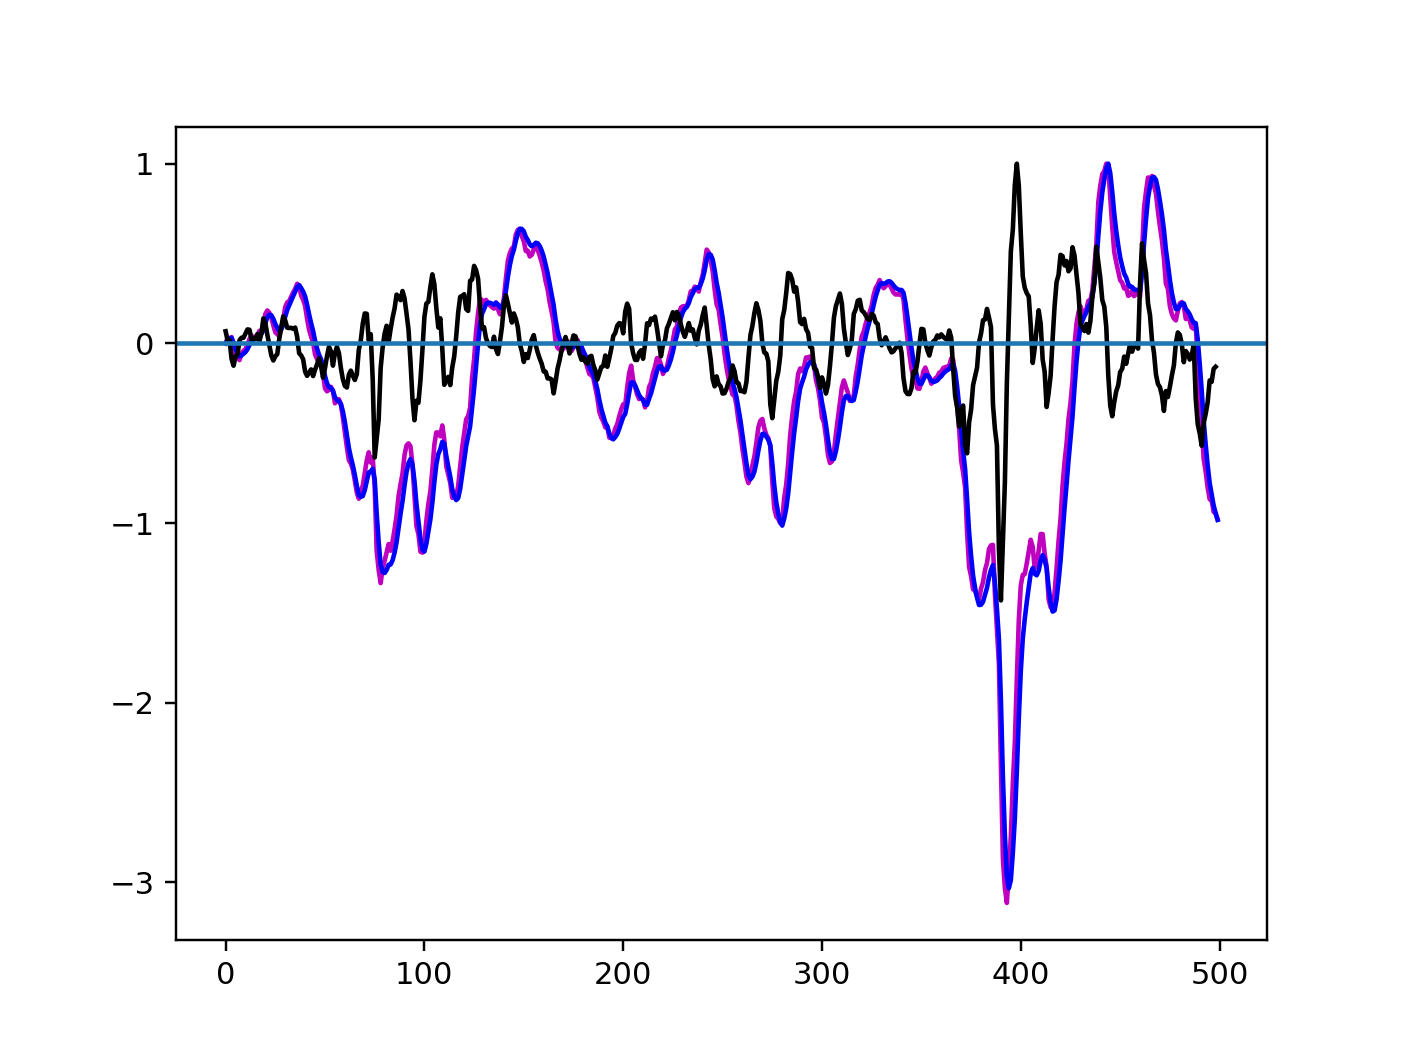

In [74]:
acry.make_macd_plot()

y1=np.array(pd.Series.ewm(acry.dataframe["MACD"], span=4).mean())
y0=np.array(acry.dataframe["MACD"])

figure()
plot(y0/max(y0[y0==y0]),"m-")
plot(y1/max(y1[y1==y1]),"b-")
plot(np.diff(y1)/max(np.diff(y1[y1==y1])),"k-")
axhline(0)

<IPython.core.display.Javascript object>


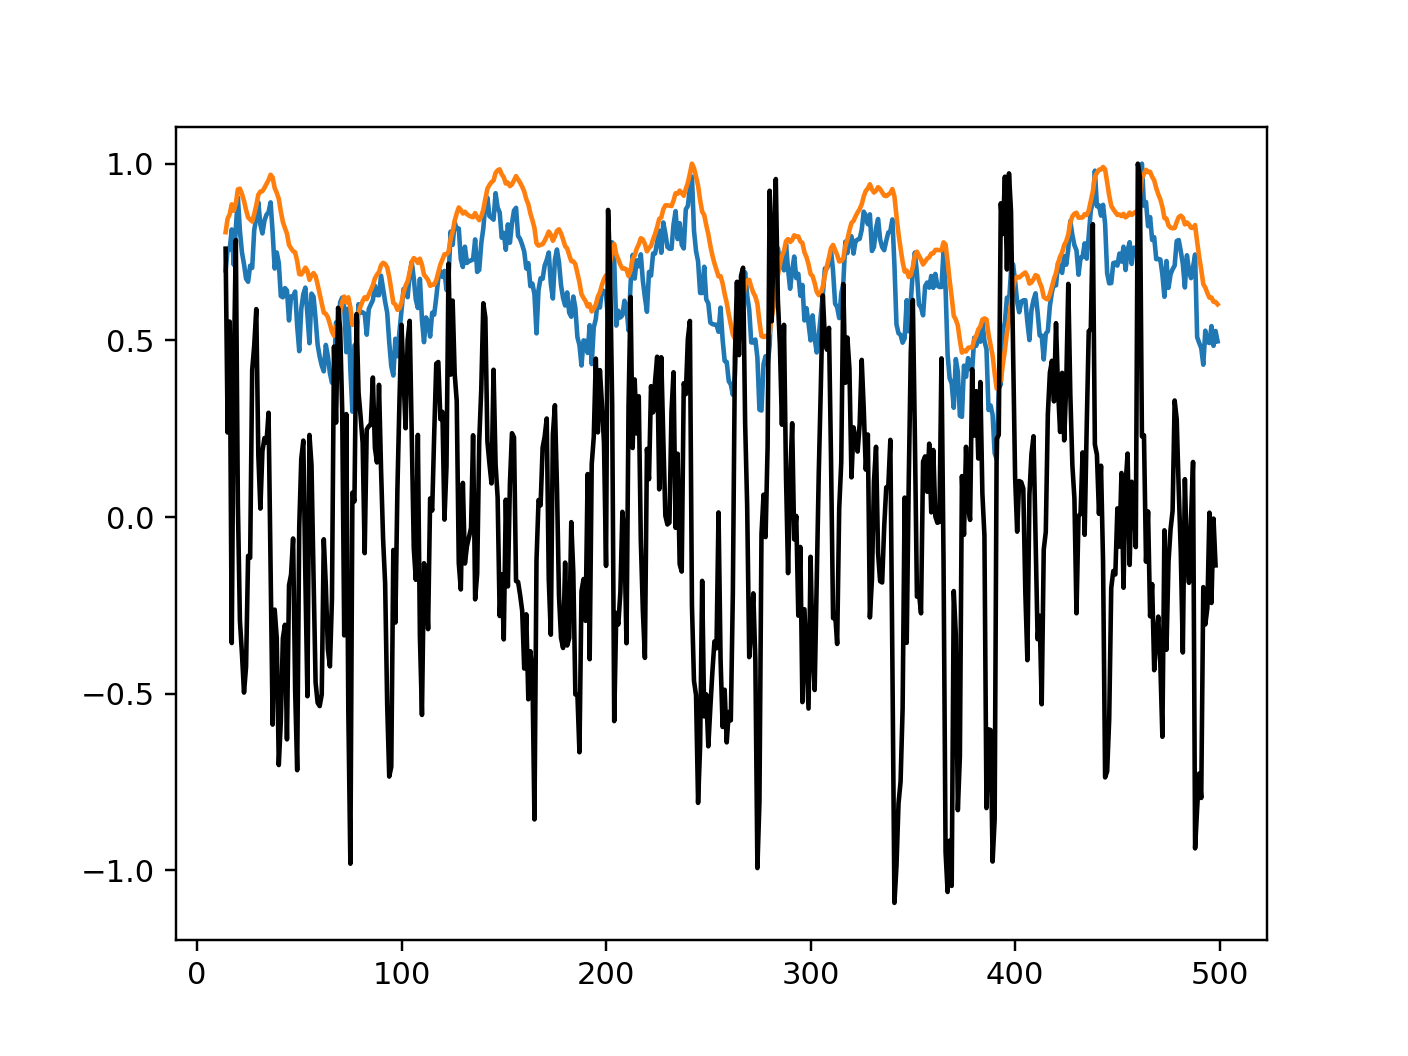

In [65]:
max(y0)

nan